## Basic Regression Model 

## Basic Regression Model 

In [ ]:
from tensorflow.keras.datasets import boston_housing
import tensorflow as tf
(X_train, Y_train), (X_test, Y_test) = boston_housing.load_data()

In [14]:
print(X_train.shape)
print(Y_train.shape)

(404, 13)
(404,)


In [15]:
def data_regularization(train,test):
    mean = train.mean()
    std = train.std()
    train -=mean
    train /=std
    test -=mean
    test /=std
    
    return train, test

In [16]:
X_train, Y_train = data_regularization(X_train, Y_train)
X_test, Y_test = data_regularization(X_test, Y_test)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 52, activation = 'relu', input_shape = (13,)),
    tf.keras.layers.Dense(units = 26, activation = 'relu'),
    tf.keras.layers.Dense(units = 18, activation = 'relu'),
    tf.keras.layers.Dense(units = 1 )
    
])

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss = 'mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 52)                728       
_________________________________________________________________
dense_5 (Dense)              (None, 26)                1378      
_________________________________________________________________
dense_6 (Dense)              (None, 18)                486       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 19        
Total params: 2,611
Trainable params: 2,611
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 32, validation_split = 0.25)
callbacks = [tf.keras.callbacks.EarlyStopping(patience=3, monitor = 'val_loss')]

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 72us/sample - loss: 0.0028 - val_loss: 0.0051
Epoch 2/25
303/303 [==============================] - 0s 77us/sample - loss: 0.0028 - val_loss: 0.0044
Epoch 3/25
303/303 [==============================] - 0s 63us/sample - loss: 0.0026 - val_loss: 0.0042
Epoch 4/25
303/303 [==============================] - 0s 66us/sample - loss: 0.0027 - val_loss: 0.0043
Epoch 5/25
303/303 [==============================] - 0s 66us/sample - loss: 0.0029 - val_loss: 0.0042
Epoch 6/25
303/303 [==============================] - 0s 72us/sample - loss: 0.0028 - val_loss: 0.0042
Epoch 7/25
303/303 [==============================] - 0s 66us/sample - loss: 0.0027 - val_loss: 0.0045
Epoch 8/25
303/303 [==============================] - 0s 68us/sample - loss: 0.0028 - val_loss: 0.0045
Epoch 9/25
303/303 [==============================] - 0s 66us/sample - loss: 0.0033 - val_loss: 0.0042
Epoch 10/25
303/303 [======

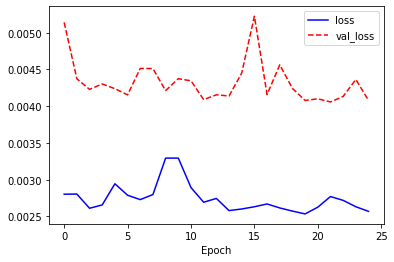

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],'b-',label = 'loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [27]:
model.evaluate(X_test, Y_test)

102/102 [==============================] - 0s 59us/sample - loss: 0.0025


0.0025197975611423746

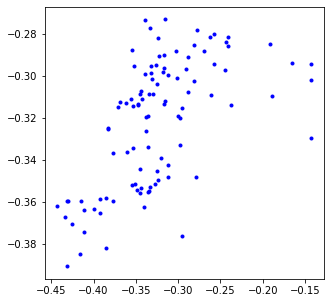

In [29]:
pred_Y = model.predict(X_test)
plt.figure(figsize = (5,5))
plt.plot(Y_test,pred_Y,'b.')